# Regularization: Ridge & Lasso

## Polynomial Regression

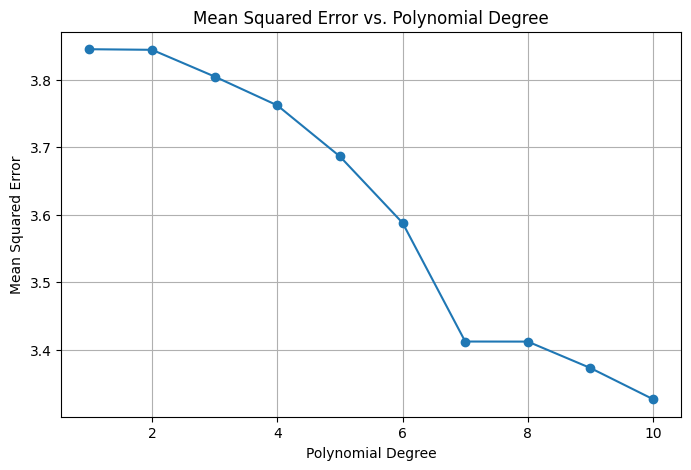

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from math import sin

# Generate synthetic data
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0,1,100)
X = np.column_stack((x1, x2))
y = np.sin(X[:, 0] + 5 * X[:, 0]) + np.random.normal(0, 2, 100)

# polynomial degress
degrees = list(range(1, 11))
mse_values = []

for i in degrees:
    poly = PolynomialFeatures(degree=i)
    lrg = LinearRegression()
    pipeline = Pipeline([("polynomial_features",poly),("linear_regression",lrg)])
    pipeline.fit(X, y)
    
    y_pred = pipeline.predict(X)
    
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)
    
plt.figure(figsize=(8, 5))
plt.plot(degrees, mse_values, marker='o')
plt.title('Mean Squared Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.grid(True)

plt.show()

## Regularization: Ridge Regression

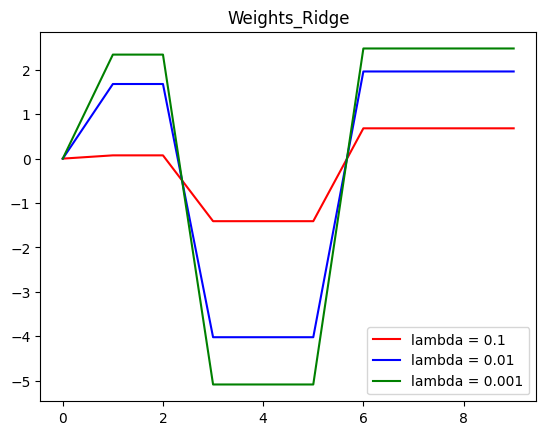

In [8]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
degree = 3

lambdas = [0.1, 0.01, 0.001]
colors = ['red', 'blue', 'green']
for i in range(3):
    l = lambdas[i]
    poly = PolynomialFeatures(degree=3)
    ridge = Ridge(alpha=l)
    pipeline = Pipeline([("polynomial_features",poly),("linear_regression",ridge)])
    pipeline.fit(X, y)
    coef = ridge.coef_
    plt.plot(coef,color=colors[i], label=f'lambda = {l}')
    
plt.legend()
plt.title('Weights_Ridge')

plt.show()

## Regularization: Lasso Regression

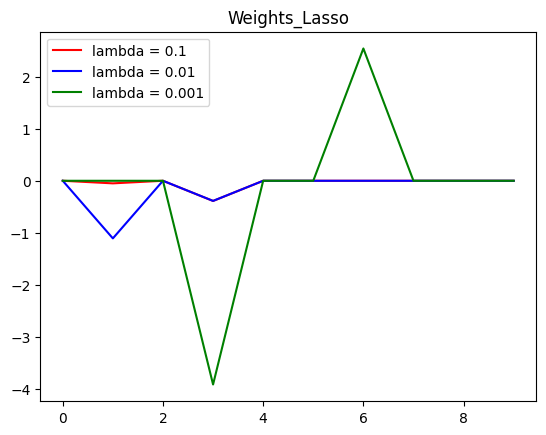

In [9]:
from sklearn.linear_model import Lasso

for i in range(3):
    l = lambdas[i]
    poly = PolynomialFeatures(degree=3)
    lasso = Lasso(alpha=l)
    pipeline = Pipeline([("polynomial_features",poly),("linear_regression",lasso)])
    pipeline.fit(X, y)
    coef = lasso.coef_
    plt.plot(coef,color=colors[i], label=f'lambda = {l}')
    
plt.legend()
plt.title('Weights_Lasso')
plt.show()

## Ridge vs Lasso

Similarity: Both of them are reuglaarization method.

Difference: Lasso turns some weights to zero (give up some features), Ridge turns all features smaller but not to zero